# Metacritic Comments and Scores
This dataset is a web scrape of Metacritic user comments and reviews by Dahlia at kaggle.com. Metacritic is a review aggregator for movies, TV shows, music albums, and video games.

Source: https://www.kaggle.com/dahlia25/metacritic-video-game-comments, accessed on July 26th, 2020.

The web scraper can be found at https://github.com/dahlia25/game_recommender, and uses Selenium and BeautifulSoup.

The data range between 1998 and 2018.

## The Dataset
Number of Rows | Number of Columns | One Row Represents
------------- | ------------- | -------------
283,983 | 5 | One user review

In [12]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [13]:
df = pd.read_csv("Datasets/metacritic_game_user_comments.csv", index_col = 0)

In [14]:
df.head()

,Title,Platform,Userscore,Comment,Username
0,The Legend of Zelda: Ocarina of Time,Nintendo64,10,"Everything in OoT is so near at perfection, it...",SirCaestus
1,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I won't bore you with what everyone is already...,Kaistlin
2,The Legend of Zelda: Ocarina of Time,Nintendo64,10,Anyone who gives the masterpiece below a 7 or ...,Jacody
3,The Legend of Zelda: Ocarina of Time,Nintendo64,10,I'm one of those people who think that this is...,doodlerman
4,The Legend of Zelda: Ocarina of Time,Nintendo64,10,This game is the highest rated game on Metacr...,StevenA


In [15]:
platform = df.groupby(by = df["Platform"])
platform.describe().head(30)

Userscore                                                
                    count      mean       std  min  25%   50%   75%   max
Platform                                                                 
3DS                4812.0  8.482959  2.141512  0.0  8.0   9.0  10.0  10.0
DS                 3047.0  8.484739  2.154950  0.0  8.0   9.0  10.0  10.0
Dreamcast           456.0  9.138158  1.935383  0.0  9.0  10.0  10.0  10.0
GameBoyAdvance     1588.0  9.091310  1.715374  0.0  9.0  10.0  10.0  10.0
GameCube           3479.0  8.975855  2.007746  0.0  9.0  10.0  10.0  10.0
Nintendo64         2401.0  9.241566  1.731797  0.0  9.0  10.0  10.0  10.0
PC               118936.0  7.195979  3.387906  0.0  5.0   9.0  10.0  10.0
PSP                1732.0  8.390300  2.323387  0.0  8.0   9.0  10.0  10.0
PlayStation        2396.0  9.095576  1.830513  0.0  9.0  10.0  10.0  10.0
PlayStation2      10637.0  8.634859  2.298024  0.0  8.0  10.0  10.0  10.0
PlayStation3      32430.0  7.609682  3.081676  0.0  7.0   9.0  10.0  10.0
PlayStation4      33547.0  7.771425  3.003502  0.0  7.0   9.0  10.0  10.0
PlayStationVita    1555.0  8.783923  1.782114  0.0  8.0   9.0  10.0  10.0
Switch             5922.0  8.813239  2.179089  0.0  9.0  10.0  10.0  10.0
Wii                5232.0  8.645642  2.206550  0.0  8.0  10.0  10.0  10.0
WiiU               4420.0  8.862217  1.845902  0.0  9.0  10.0  10.0  10.0
Xbox               4713.0  8.474645  2.368047  0.0  8.0   9.0  10.0  10.0
Xbox360           37420.0  7.364297  3.206230  0.0  6.0   9.0  10.0  10.0
XboxOne            9137.0  7.279851  3.217717  0.0  6.0   9.0  10.0  10.0
not specified       123.0  7.861789  2.473881  0.0  7.0   9.0  10.0  10.0

In [16]:
first_row = df.iloc[0]
print(first_row)

dfN64 = df[df["Platform"] == "Nintendo64"]
n64Text = dfN64["Comment"].str.cat(sep = " ")

stopwords = set(STOPWORDS)
stopwords.update(["game", "play", "played", "to", "feel", "even", "want", "make", "made", "much", "still", "playing", "one", "games"])

cloud = WordCloud(width = 1200, height = 800, stopwords = stopwords, background_color = "white").generate(n64Text)

Title                     The Legend of Zelda: Ocarina of Time
Platform                                            Nintendo64
Userscore                                                   10
Comment      Everything in OoT is so near at perfection, it...
Username                                            SirCaestus
Name: 0, dtype: object


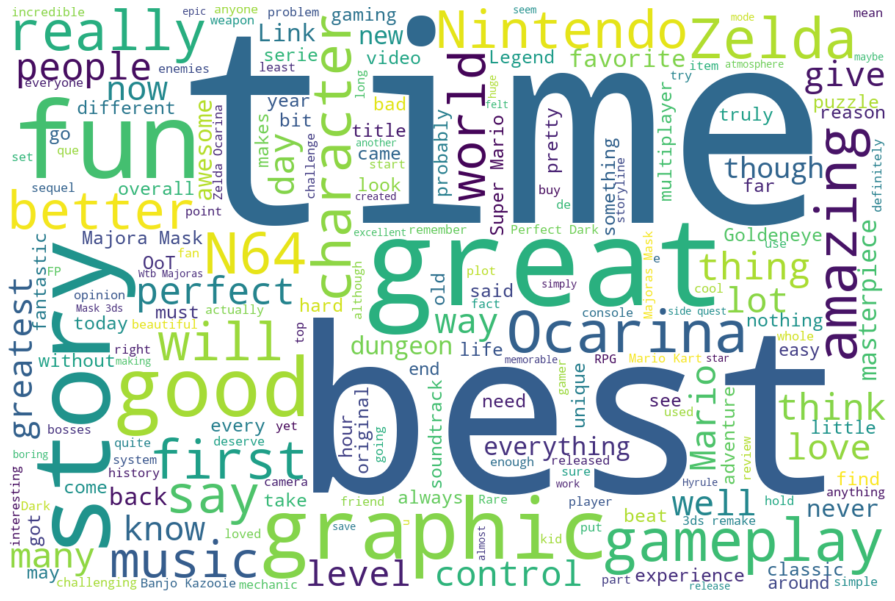

In [17]:
plt.figure(figsize = (19.2, 10.8))
plt.imshow(cloud, interpolation = "bilinear")
plt.axis("off")
plt.show()